# BUILDING A CLASSIFICATION NN USING THE Sequential API

* SEE: [`The Sequential model`](https://www.tensorflow.org/guide/keras/sequential_model)

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Loading the dataset using Keras

In [2]:
# Dividing features by 255.0 = scaling them to 0-1 range for Gradient Descent
# Creating a validation set from the training set

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape, X_train_full.dtype)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[0]])

(60000, 28, 28) uint8
Coat


# Creating the model using the Sequential API

* [`tf.keras.layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): 
  * computes `X.reshape(-1, 1)`
  * layer with no parameters, only for preprocessing
  * first layer, so should specify the `input_shape` (shape of instances-
    
    
* Shape of weight matrix depends on number of inputs:
  * so recommended to specify `input_shape` in first layer
  * if not specified, Keras waits until it knows the input shape before it actually builds the model:
    * when you feed it actual data (during training)
    * or when you call `build()`
    * before that, layers don't have any weights, so cannot use `summary()` or save the model
  
  
* [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense):
  * each `Dense` layer has a **weight matrix** (connection between neurons and their inputs) and **vector of bias terms** (one per neuron)
  * Dense layers often have **a lot of parameters**
    * ex. 1st hidden layer = 784*300 connection weights + 300 bias terms = 233500 parameters!
    * gives the model **flexibility to fit the data**
    * but risk of **overfitting** especially if few training data
  * [`tf.keras.Initializers`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers): Initializations
    * Weights initialized randomly  
      `kernel_initializer` (*kernel* = name for the matrix of connection weights)
    * Biases initialized to zeros  
      `bias_initializer`

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax)) # 10 classes, exclusive > softmax

### Model inspection

In [4]:
model.summary()  # output shape None means batch size can be anything

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
print(model.layers)

hidden1 = model.layers[1]
print('\n1ST HIDDEN LAYER: ', hidden1.name)

model.get_layer('dense_1') is hidden1

[<tensorflow.python.keras.layers.core.Flatten object at 0x10452f810>, <tensorflow.python.keras.layers.core.Dense object at 0x13570b710>, <tensorflow.python.keras.layers.core.Dense object at 0x4366374d0>, <tensorflow.python.keras.layers.core.Dense object at 0x63698bf50>]

1ST HIDDEN LAYER:  dense


False

In [7]:
# Access layers' parameters with get_weights() and set_weights()

weights, biases = hidden1.get_weights()

print('WEIGHTS:\n')
print(weights)
print(weights.shape)

print('\nBIASES:\n')
print(biases)
print(biases.shape)

WEIGHTS:

[[ 0.03681717  0.04050148  0.02365103 ...  0.04408857 -0.05118364
  -0.0442734 ]
 [-0.05882679 -0.03354867  0.02585798 ...  0.00825866  0.05465746
  -0.0008164 ]
 [ 0.02842608  0.03734814 -0.04776242 ...  0.04247584  0.05190761
  -0.06603684]
 ...
 [-0.03019105  0.03650685  0.07058959 ...  0.07191615 -0.01847387
  -0.01700728]
 [ 0.04432818 -0.02014582 -0.00243541 ... -0.04225075  0.01276939
   0.06297745]
 [-0.03155754 -0.03559379 -0.03066321 ...  0.03457319  0.0471295
  -0.0613303 ]]
(784, 300)

BIASES:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Compiling the model

* [`tf.keras.losses`](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
* [`tf.keras.optimizers`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* [`tf.keras.metrics`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)   
<br/>  
    
* **Loss function:**  
  * `sparse_categorical_entropy`: if sparse labels (1 target among 10) + exclusive  
  * `categorical_crossentropy`: if multi-class with 1 target proba per instance (one-hot vectors)  
  * `sigmoid` activation on output + `binary_crossentropy` loss: if binary classification (one or more binary labels)   
<br/>  
    
* **Optimizers:**
  * more efficient optimizers improve the GD part, not the autodiff
  * with SGD, always tune the **learning rate** (default: 0.01): `optimizer=keras.optimizers.SGD(lr=???)`


In [8]:
# Specify loss function, optimizer, and optionally extra metrics for training and evaluation

model.compile(loss='sparse_categorical_crossentropy',  # sparse labels (1 class among 10) + exclusive
              optimizer='sgd',                         # backpropagation (reverse-mode autodiff + GD)
              metrics=['accuracy'])                    # because it is a classifier

# Training and evaluating the model

* Compute loss and extra metrics on validation set at the end of each epoch,   
  very useful to see how well the model really performs
* If perf on training set much better than on validation set   
  -> probably overfitting (or bug, such as mismatch between training and validation data)  
  
  
* Instead of `validation_data` we can set `validation_split` to the ratio of the training set you want Keras to use for validation  
  ex: `validation_split=0.1`: use 10% of data for validation, before shuffling  
  
  
* `class_weight`:  
  If training set skewed with some classes overrepresented and others underrepresented: use `class_weight` argument to `fit()`   
  to give larger weight to underrepresented classes and lower weights to overrepresented ones (weights used when computing the loss)
* `sample_weight`:  
  For per-instance weights,   
  ex: if some instances labeled by experts and others by crowdsourcing  
  or to give sample weights (but not class weights) to validation set (add them as 3rd item in `validation_data` tuple  
* If both `class_weight` and `sample_weight` provided: they are multiplied  
  
  
* `History` object:
  * `history.params`: training parameters
  * `history.epoch`: list of epochs it went through
  * `history.history`: dictionary containing loss and extra metrics at the end of each epoch
  * use it to create a `pd.DataFrame` and call its `plot()` method to **show learning curves**

In [9]:
history = model.fit(X_train,                            # input features
                    y_train,                            # target classes
                    epochs=30,                          # default: 1
                    validation_data=(X_valid, y_valid)) # optional

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7227 - accuracy: 0.7625 - val_loss: 0.4993 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4894 - accuracy: 0.8306 - val_loss: 0.4602 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4445 - accuracy: 0.8435 - val_loss: 0.4096 - val_accuracy: 0.8594
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8549 - val_loss: 0.4029 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8615 - val_loss: 0.3908 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3738 - val_accuracy: 0.8704
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3644 - accuracy: 0.8717 - val_loss: 0.3694 - val_accuracy:

### Plotting metrics

* Both training and validation accuracy steadily increase during training,   
  while training and validation loss decrease  
  -> good!
* Validation curves are close to the training curves  
  -> not too much overfitting
* Validation error computed at the *end* of each epoch,  
  training error computed *during* epoch  
  -> training loss curve **should be shifted by half an epoch** to the left !!   
  -> training and validation curves overlap almost perfectly at the beginning of training

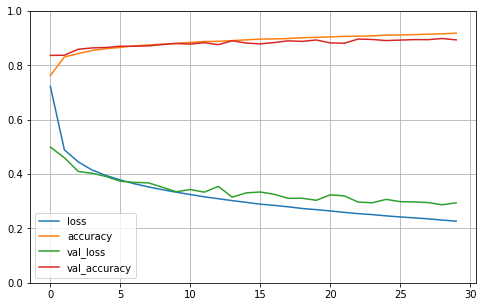

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set vertical range to [0-1]
plt.show()

### Tuning the model's hyperparameters for better results

* Check the learning rate
* Try another optimizer
* Change number of layers
* Change number of neurons per layer
* Change type of activation functions for each hidden layer
* Change `batch_size` argument to `fit()` (default: 32)
* Retune learning rate after changing any parameter!!   
  
### Testing the model

* Once you are satisfied with validation accuracy, evaluate the model on the test set to estimate **generalization error** before deploying to production

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8861


[0.32479777932167053, 0.8860999941825867]

# Using the model to make predictions

* Ouput = **one probability per class**

In [12]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

* Output = **class with highest probability** (even if it's quite low)

In [23]:
y_pred = model.predict_classes(X_new)
print('preds       : ', y_pred)
print('              ', np.array(class_names)[y_pred])
print('target preds: ', y_test[:3])

preds       :  [9 2 1] ['Ankle boot' 'Pullover' 'Trouser']
               ['Ankle boot' 'Pullover' 'Trouser']
target preds:  [9 2 1]


# Saving and Restoring the model

In [ ]:
model.save('my-sequential-api-classification.h5')
model = keras.models.load_model('my-sequential-api-classification.h5')

* If training takes several hours: use **callbacks** (see next sections)
  * save model at the end of training
  * plus save checkpoints at regular intervals during training (avoid loosing everything)
  

# COMPLETE LISTING

(60000, 28, 28) uint8
Coat
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7145 - accuracy: 0.7666 - val_loss: 0.5022 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss:

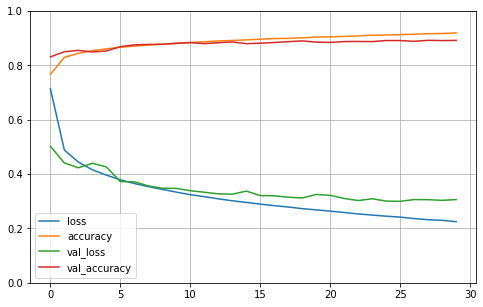

313/313 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8821
[[0.   0.   0.   0.   0.   0.   0.   0.03 0.   0.97]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
preds       :  [9 2 1]
               ['Ankle boot' 'Pullover' 'Trouser']
target preds:  [9 2 1]


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# -- Loading the dataset using Keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape, X_train_full.dtype)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[0]])

# -- Creating the model using the Sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation=tf.keras.activations.softmax)) # 10 classes, exclusive > softmax

model.summary()  # output shape None means batch size can be anything

# --- Compiling the model

model.compile(loss='sparse_categorical_crossentropy',   # sparse labels (1 class among 10) + exclusive
              optimizer='sgd',                          # backpropagation (reverse-mode autodiff + GD)
              metrics=['accuracy'])                     # because it is a classifier

# --- Training and evaluating the model

history = model.fit(X_train,                             # input features
                    y_train,                             # target classes
                    epochs=30,                           # default: 1
                    validation_data=(X_valid, y_valid))  # optional

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set vertical range to [0-1]
plt.show()

# --- Evaluating the model

model.evaluate(X_test, y_test)

# --- Using the model to make predictions

# Output = one probability per class
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

# Output = class with the highest probability
y_pred = model.predict_classes(X_new)
print('preds       : ', y_pred)
print('              ', np.array(class_names)[y_pred])
print('target preds: ', y_test[:3])

# --- Saving/Restoring the model

model.save('my-sequential-api-classification.h5')
model = keras.models.load_model('my-sequential-api-classification.h5')